In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *


## Max mutual information vs sampling density for different samples

In [2]:
N_objects = 2000
num_bootstraps = 10
noise_sigma = 1e-3
num_samples = np.linspace(2, 96, 12).astype(int)

objects_dict = {
  'delta_uniform': lambda : np.array([sample_amplitude_object('delta', num_deltas=1, gaussian_mixture_position=False) for i in range(N_objects)]),
  'delta_nonuniform': lambda: np.array([sample_amplitude_object('delta', num_deltas=1, gaussian_mixture_position=True) for i in range(N_objects)]),
  'white_noise': lambda : np.array([sample_amplitude_object('white_noise') for i in range(N_objects)]),
  'pink_noise': lambda : np.array([sample_amplitude_object('pink_noise') for i in range(N_objects)]),
  '8_deltas_uniform': lambda :np.array([sample_amplitude_object('delta', num_deltas=8, gaussian_mixture_position=False) for i in range(N_objects)]),
  '8_deltas_nonuniform': lambda : np.array([sample_amplitude_object('delta', num_deltas=8, gaussian_mixture_position=True) for i in range(N_objects)]),
}

# num_nyquist_samples = int(NUM_NYQUIST_SAMPLES // 2)
num_nyquist_samples = NUM_NYQUIST_SAMPLES

mi_by_object = {}
for name, objects_fn in objects_dict.items():
  print(name)
  mutual_information = []
  for N in tqdm(num_samples):
    erasure_mask = onp.zeros(OBJECT_LENGTH)
    sample_indices = onp.linspace(0, OBJECT_LENGTH - 1, N).astype(int)
    erasure_mask[sample_indices] = 1
    erasure_mask = np.array(erasure_mask, dtype=bool)
    mi_bootstraps = []
    for k in range(num_bootstraps):
      initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi = optimize_PSF_and_estimate_mi(
          objects_fn, noise_sigma, erasure_mask, num_nyquist_samples=num_nyquist_samples, nyquist_sample_output=False)
      mi_bootstraps.append(optimized_mi)

    mutual_information.append(mi_bootstraps)
  mi_by_object[name] = mutual_information


delta_uniform


  0%|                                                         | 0/12 [00:00<?, ?it/s]

initial loss -3.221197501546938
initial loss -3.3117668972035865
initial loss -3.2461343409238883
initial loss -3.068705469721656
initial loss -3.352488329163773
initial loss -3.285756158182034
initial loss -2.999373310691516
initial loss -3.5387691914650192
initial loss -3.3971322365133982
initial loss -3.544871794360387


  8%|███▊                                          | 1/12 [06:19<1:09:37, 379.81s/it]

initial loss -3.8711985382410257
initial loss -3.6947233157481465
initial loss -3.5845677141188936
initial loss -3.890604675289657
initial loss -3.670822105177952
initial loss -3.94053630482979
initial loss -3.2691861946396106
initial loss -3.667472160303249
initial loss -3.5898852969936197
initial loss -3.8632546856752725


 17%|███████▋                                      | 2/12 [13:31<1:08:26, 410.61s/it]

initial loss -3.3031748684321784
initial loss -3.6716006841396283
initial loss -3.5105933244254497
initial loss -3.3268309493178534
initial loss -3.583093733463407
initial loss -3.8878978574845364
initial loss -3.378834314514345
initial loss -3.538792058409042
initial loss -3.1277955399783823
initial loss -3.3536093436871584


 25%|███████████▌                                  | 3/12 [20:32<1:02:17, 415.25s/it]

initial loss -3.090882536950366
initial loss -3.54136930902146
initial loss -3.456521931593238
initial loss -3.8397080478500683
initial loss -3.5853498990672423
initial loss -3.679349069335868
initial loss -3.400263360111575
initial loss -3.3659515189909333
initial loss -3.4108614182618284
initial loss -3.27683407128628


 33%|████████████████                                | 4/12 [28:06<57:24, 430.58s/it]

initial loss -3.3470174157224966
initial loss -3.042533083910946
initial loss -3.447163034067173
initial loss -3.232321498961126
initial loss -2.6832518078170793
initial loss -3.0486064500658596
initial loss -2.81981616926351
initial loss -2.9741859232913623
initial loss -3.2188409744806665
initial loss -2.9038747296728595


 42%|████████████████████                            | 5/12 [35:08<49:50, 427.24s/it]

initial loss -2.9374022303349387
initial loss -2.7308390639271836
initial loss -2.6446655769986678
initial loss -2.764492717498329
initial loss -2.873065695278766
initial loss -2.575396797078549
initial loss -2.1358305813823306
initial loss -2.8635642672067116
initial loss -2.8116950055005905
initial loss -2.565823057877699


 50%|████████████████████████                        | 6/12 [42:19<42:51, 428.50s/it]

initial loss -2.149530233236106
initial loss -2.455125596632053
initial loss -2.2773968479393383
initial loss -2.3273675073093787
initial loss -2.2872442847771937
initial loss -1.9655396518893327
initial loss -2.218386011104693
initial loss -2.154155593511888
initial loss -2.304427128084498
initial loss -2.4196298105624936


 58%|████████████████████████████                    | 7/12 [49:45<36:11, 434.28s/it]

initial loss -2.1015424349755962
initial loss -2.0090869892998158
initial loss -2.1068873477678136
initial loss -1.8309244506374163
initial loss -2.0652610383501138
initial loss -1.8759650766575424
initial loss -1.7449358210136656
initial loss -2.2037710699618627
initial loss -2.1384572294567166
initial loss -1.9763418852747239


 67%|████████████████████████████████                | 8/12 [57:16<29:18, 439.64s/it]

initial loss -1.7079185172713112
initial loss -1.7485763775751026
initial loss -1.848242075694624
initial loss -1.7525104480038343
initial loss -1.783380858318992
initial loss -1.7472201080771514
initial loss -1.7858447347190918
initial loss -1.9775932050625076
initial loss -1.7640574683538948
initial loss -1.6387869170167573


 75%|██████████████████████████████████▌           | 9/12 [1:06:04<23:22, 467.36s/it]

initial loss -1.8076979404644784
initial loss -1.6870881866698773
initial loss -1.6536667802713851
initial loss -1.5388059767643019
initial loss -1.5186699476858572
initial loss -1.6707973774110667
initial loss -1.6461054362053364
initial loss -1.7975398023142926
initial loss -1.689919537424758
initial loss -1.6406438149846445


 83%|█████████████████████████████████████▌       | 10/12 [1:15:15<16:26, 493.10s/it]

initial loss -1.499719869359887
initial loss -1.5745842107788999
initial loss -1.4779402914074318
initial loss -1.4423447838561414
initial loss -1.4170097592484785
initial loss -1.429308028235555
initial loss -1.4786283637827509
initial loss -1.5216253825953243
initial loss -1.4543750595082552
initial loss -1.4978842533771486


 92%|█████████████████████████████████████████▎   | 11/12 [1:24:50<08:38, 518.30s/it]

initial loss -1.2348757166304214
initial loss -1.453363938195055
initial loss -1.5393231674476069
initial loss -1.4258489182614422
initial loss -1.260832020857489
initial loss -1.3878529510252542
initial loss -1.3711474042230773
initial loss -1.4328499749049692
initial loss -1.2825235513410933
initial loss -1.3458036600758965


100%|█████████████████████████████████████████████| 12/12 [1:34:43<00:00, 473.63s/it]


delta_nonuniform


  0%|                                                         | 0/12 [00:00<?, ?it/s]

initial loss -3.3459972576207093
initial loss -3.374578457445468
initial loss -3.2303496480266665
initial loss -3.22957996600341
initial loss -3.396820333056062
initial loss -3.2929951673053353
initial loss -3.216322803307057
initial loss -3.3893750340267066
initial loss -3.587241374295134
initial loss -3.3628586425693485


  8%|███▊                                          | 1/12 [06:45<1:14:16, 405.14s/it]

initial loss -3.4217553679972683
initial loss -2.9237914360299317
initial loss -3.6100704646112662
initial loss -3.2188243956392073
initial loss -3.6918410939055057
initial loss -3.306720923519965
initial loss -3.385857978055342
initial loss -3.420323314651939
initial loss -3.2201467796055683
initial loss -3.4496038600895575


 17%|███████▋                                      | 2/12 [13:56<1:10:06, 420.64s/it]

initial loss -3.1335247434871176
initial loss -3.2827599843705477
initial loss -3.5046482700362684
initial loss -3.1175350349324615
initial loss -2.844203778775046
initial loss -3.356894195550988
initial loss -3.045272101281837
initial loss -2.9462112374677094
initial loss -3.2218759609401695
initial loss -3.3916993011202794


 25%|███████████▌                                  | 3/12 [21:18<1:04:31, 430.15s/it]

initial loss -2.631420175198258
initial loss -2.9017227444548372
initial loss -2.908880804144523
initial loss -2.752498886574689
initial loss -2.6828424319145414
initial loss -2.87577685438458
initial loss -2.92268355892559
initial loss -2.7907653440301727
initial loss -2.830991250924755
initial loss -2.8742118661677


 33%|███████████████▎                              | 4/12 [29:18<1:00:00, 450.08s/it]

initial loss -2.295874759513389
initial loss -2.5315223296357603
initial loss -2.4376778157539123
initial loss -2.5350692017648986
initial loss -2.4848781762696355
initial loss -2.5123785392960554
initial loss -2.363319188879804
initial loss -2.4744577156651517
initial loss -2.3186979180209044
initial loss -2.237823445796166


 42%|████████████████████                            | 5/12 [36:31<51:45, 443.69s/it]

initial loss -1.958645886057926
initial loss -2.2140900404574255
initial loss -1.9830494791432103
initial loss -2.04729754185451
initial loss -2.2163043566083958
initial loss -2.013545776895617
initial loss -2.0925289004191976
initial loss -2.2491968353069702
initial loss -2.1184571319560286
initial loss -2.0796922907695112


 50%|████████████████████████                        | 6/12 [43:55<44:24, 444.01s/it]

initial loss -1.8747426546459802
initial loss -1.673493474931148
initial loss -1.69624863033829
initial loss -1.6650337177458032
initial loss -1.7094605141242725
initial loss -1.8223671429233734
initial loss -1.9563466778479908
initial loss -1.7585972307785136
initial loss -1.733275343261959
initial loss -1.7852791723897057


 58%|████████████████████████████                    | 7/12 [51:35<37:25, 449.03s/it]

initial loss -1.6399767773314133
initial loss -1.379271688678621
initial loss -1.5834093525090827
initial loss -1.667754918987222
initial loss -1.5969324063934691
initial loss -1.4323986520688472
initial loss -1.7364760728504673
initial loss -1.6198032435288707
initial loss -1.7111466636460302
initial loss -1.36411791479601


 67%|████████████████████████████████                | 8/12 [59:23<30:21, 455.32s/it]

initial loss -1.4504093360579835
initial loss -1.3341775434687275
initial loss -1.3123793378847717
initial loss -1.429123088400103
initial loss -1.4277194287760182
initial loss -1.5068690048373494
initial loss -1.4933849679009865
initial loss -1.3377683756923209
initial loss -1.349059803025848
initial loss -1.4599568954084645


 75%|██████████████████████████████████▌           | 9/12 [1:08:31<24:12, 484.07s/it]

initial loss -1.3999036488414744
initial loss -1.3644839548704488
initial loss -1.2093125810896062
initial loss -1.2445277984751903
initial loss -1.2809433988126724
initial loss -1.2633283112241427
initial loss -1.3574381136891993
initial loss -1.3384838352476323
initial loss -1.3194563113432078
initial loss -1.3901698627739392


 83%|█████████████████████████████████████▌       | 10/12 [1:17:53<16:56, 508.12s/it]

initial loss -1.1437469992091316
initial loss -1.3332239103310253
initial loss -1.1426091573367654
initial loss -1.2016469689541858
initial loss -1.2513526219526403
initial loss -1.1651996624278638
initial loss -1.1761203156917088
initial loss -1.2734873286892203
initial loss -1.134018487912756
initial loss -1.150271002082214


 92%|█████████████████████████████████████████▎   | 11/12 [1:27:35<08:50, 530.93s/it]

initial loss -1.047189279008921
initial loss -1.1240491290038799
initial loss -1.1501838830723425
initial loss -1.084771883810496
initial loss -1.0582404580838427
initial loss -1.0628365927802164
initial loss -1.1735182384699694
initial loss -1.2279145277832901
initial loss -1.0319080252141655
initial loss -1.07629174796319


100%|█████████████████████████████████████████████| 12/12 [1:37:35<00:00, 487.93s/it]


white_noise


  0%|                                                         | 0/12 [00:00<?, ?it/s]

initial loss -0.2478999859179574
initial loss -0.3039396240320531
initial loss -0.22261865308689943
initial loss -0.3151766911077777
initial loss -0.23718453798631917
initial loss -0.2688680542359514
initial loss -0.40497394349154264
initial loss -0.2503651049297433
initial loss -0.3097070673554819
initial loss -0.33054652708183513


  8%|███▊                                          | 1/12 [06:49<1:14:59, 409.08s/it]

initial loss -0.2995379067535814
initial loss -0.27411849356006357
initial loss -0.43968247580789166
initial loss -0.2991253405988507
initial loss -0.19992602320518077
initial loss -0.2235110552572116
initial loss -0.2840056773543763
initial loss -0.25933097454375126
initial loss -0.2811091053169185
initial loss -0.29306790633354773


 17%|███████▋                                      | 2/12 [14:21<1:12:28, 434.86s/it]

initial loss -0.3903572734825328
initial loss -0.32970122112693123
initial loss -0.29227450597726595
initial loss -0.31692272065429117
initial loss -0.27453601719339366
initial loss -0.25552125842596707
initial loss -0.30814398694432893
initial loss -0.32007061674031534
initial loss -0.31339872769052685
initial loss -0.40329064553272875


 25%|███████████▌                                  | 3/12 [21:48<1:06:00, 440.04s/it]

initial loss -0.3288722585539959
initial loss -0.25829616021364044
initial loss -0.32964575602423
initial loss -0.2805273605040068
initial loss -0.23913447036276683
initial loss -0.3373898806644445
initial loss -0.1988785537481625
initial loss -0.24389968543669163
initial loss -0.35883854294918704
initial loss -0.3543072660972879


 33%|███████████████▎                              | 4/12 [29:50<1:00:53, 456.68s/it]

initial loss -0.2647493358480626
initial loss -0.31981817085032876
initial loss -0.30988799849230353
initial loss -0.3364559016266047
initial loss -0.34965750938151313
initial loss -0.25743622495970697
initial loss -0.2292018558974147
initial loss -0.34805866928893675
initial loss -0.29053384711148467
initial loss -0.3570296668438973


 42%|████████████████████                            | 5/12 [37:10<52:36, 450.86s/it]

initial loss -0.16011666701124874
initial loss -0.31144741984215035
initial loss -0.329123567630828
initial loss -0.25841395395786804
initial loss -0.26037822424636115
initial loss -0.2949985890616215
initial loss -0.24781001027134772
initial loss -0.18912888501155908
initial loss -0.3401166423338183
initial loss -0.30436640341753896


 50%|████████████████████████                        | 6/12 [44:43<45:08, 451.39s/it]

initial loss -0.19105749783940515
initial loss -0.2231748227331724
initial loss -0.3146925691990425
initial loss -0.1892242411144226
initial loss -0.2845869975411537
initial loss -0.22453838676072096
initial loss -0.2174689628176584
initial loss -0.16752311049742266
initial loss -0.22144887839324076
initial loss -0.29571800936529236


 58%|████████████████████████████                    | 7/12 [52:29<38:01, 456.21s/it]

initial loss -0.21082516662044115
initial loss -0.19327100641672534
initial loss -0.17693913387842264
initial loss -0.11439119272698406
initial loss -0.25824431775010415
initial loss -0.2637889647533452
initial loss -0.22412530301647668
initial loss -0.2428002685261226
initial loss -0.24325442974591513
initial loss -0.24083883082476074


 67%|██████████████████████████████▋               | 8/12 [1:00:26<30:50, 462.74s/it]

initial loss -0.18347320570953007
initial loss -0.2299458588934873
initial loss -0.24293022196224828
initial loss -0.17762288479033136
initial loss -0.22778411075137917
initial loss -0.20392286894248293
initial loss -0.1860888717008918
initial loss -0.21800435348370797
initial loss -0.14800842717577095
initial loss -0.18836516457717298


 75%|██████████████████████████████████▌           | 9/12 [1:09:37<24:31, 490.58s/it]

initial loss -0.14022890485614312
initial loss -0.20658362934074986
initial loss -0.16221914307207705
initial loss -0.17794351881625864
initial loss -0.16354525126630562
initial loss -0.27346974022808523
initial loss -0.2537039111843505
initial loss -0.2077057567239364
initial loss -0.1908602098453667
initial loss -0.34008004233075345


 83%|█████████████████████████████████████▌       | 10/12 [1:19:07<17:09, 514.84s/it]

initial loss -0.17151881857156745
initial loss -0.1859096001574508
initial loss -0.13821568247548122
initial loss -0.17464284200676206
initial loss -0.15934887263983627
initial loss -0.22391887673406005
initial loss -0.1958154256411879
initial loss -0.20689566101700477
initial loss -0.20195222427220974
initial loss -0.18122010925983642


 92%|█████████████████████████████████████████▎   | 11/12 [1:28:58<08:58, 538.35s/it]

initial loss -0.22827721451110333
initial loss -0.21948657374713892
initial loss -0.2222114475915356
initial loss -0.1432240784309384
initial loss -0.1452278059901027
initial loss -0.16610853355293298
initial loss -0.2103227606720203
initial loss -0.16796812707572828
initial loss -0.14067159337384272
initial loss -0.13538442616701168


100%|█████████████████████████████████████████████| 12/12 [1:39:04<00:00, 495.39s/it]


pink_noise


  0%|                                                         | 0/12 [00:00<?, ?it/s]

initial loss -0.22551820533413355
initial loss -0.3010494240884448
initial loss -0.2990877951094519
initial loss -0.31575334429910057
initial loss -0.3280742665286534
initial loss -0.39486839874865926
initial loss -0.3191956119304645
initial loss -0.35322463782349645
initial loss -0.48835211063300704
initial loss -0.3158368727577372


  8%|███▊                                          | 1/12 [07:36<1:23:42, 456.62s/it]

initial loss -0.3731751899783087
initial loss -0.4192223494410452
initial loss -0.40144094750169224
initial loss -0.29139921436979305
initial loss -0.4842175031546617
initial loss -0.6422536086393688
initial loss -0.508255068239054
initial loss -0.521272219148331
initial loss -0.49337974696166376
initial loss -0.5369643412077728


 17%|███████▋                                      | 2/12 [15:54<1:20:10, 481.08s/it]

initial loss -0.35300599462634263
initial loss -0.22613765246802123
initial loss -0.5053862632831447
initial loss -0.39836222298791607
initial loss -0.2188614859480777
initial loss -0.31765871180000893
initial loss -0.295923255968337
initial loss -0.2028856369485259
initial loss -0.4481321344946105
initial loss -0.40902080855878253


 25%|███████████▌                                  | 3/12 [24:10<1:13:08, 487.64s/it]

initial loss -0.352030081704748
initial loss -0.3163976670699584
initial loss -0.24091148045408972
initial loss -0.3122669960438532
initial loss -0.3843323693602047
initial loss -0.4076942406369463
initial loss -0.3193469000977978
initial loss -0.3206147341521028
initial loss -0.5534800397072507
initial loss -0.4127503941877747


 33%|███████████████▎                              | 4/12 [32:58<1:07:10, 503.79s/it]

initial loss -0.3083213628970593
initial loss -0.4264415833976416
initial loss -0.3516773804731605
initial loss -0.4475422581706717
initial loss -0.32324883261060533
initial loss -0.296711070599886
initial loss -0.3367259335422037
initial loss -0.3822712358587554
initial loss -0.48114183630315976
initial loss -0.3682532057904057


 42%|████████████████████                            | 5/12 [41:05<58:04, 497.76s/it]

initial loss -0.3019453401971991
initial loss -0.2041631525801318
initial loss -0.2576555417443255
initial loss -0.3200559999152826
initial loss -0.2936646560501075
initial loss -0.3034104096694847
initial loss -0.29253842409042163
initial loss -0.23100861190961886
initial loss -0.25654137034544433
initial loss -0.3122405727514637


 50%|████████████████████████                        | 6/12 [49:24<49:48, 498.10s/it]

initial loss -0.21443925211322754
initial loss -0.3221631914245124
initial loss -0.25281224345651504
initial loss -0.24176289127785433
initial loss -0.2718615997269316
initial loss -0.29908873463107655
initial loss -0.24942203626214624
initial loss -0.2276393457775485
initial loss -0.21452718269067944
initial loss -0.28319201944121764


 58%|████████████████████████████                    | 7/12 [57:56<41:53, 502.66s/it]

initial loss -0.2343736052816213
initial loss -0.26405992305835585
initial loss -0.2010889407357811
initial loss -0.2601571073537056
initial loss -0.3307459622575608
initial loss -0.25909418704948584
initial loss -0.22079244961143388
initial loss -0.2254309814449011
initial loss -0.19873626977054262
initial loss -0.26928798509501606


 67%|██████████████████████████████▋               | 8/12 [1:06:41<33:59, 509.83s/it]

initial loss -0.25810516714535436
initial loss -0.2845362625845517
initial loss -0.34699268821730395
initial loss -0.22938246361937042
initial loss -0.2897438808346376
initial loss -0.32367163748297045
initial loss -0.17785504381098263
initial loss -0.2730000319815661
initial loss -0.21161653998067098
initial loss -0.2840472672456633


 75%|██████████████████████████████████▌           | 9/12 [1:16:31<26:44, 534.93s/it]

initial loss -0.24380264834596377
initial loss -0.22195858827432619
initial loss -0.300184110319045
initial loss -0.20651519585502187
initial loss -0.21108298406732992
initial loss -0.30190357382090516
initial loss -0.16556720395147814
initial loss -0.2276903467259919
initial loss -0.20001978250715569
initial loss -0.2277552152036501


 83%|█████████████████████████████████████▌       | 10/12 [1:26:45<18:38, 559.07s/it]

initial loss -0.23097183410413866
initial loss -0.1991249140462284
initial loss -0.16458679819428443
initial loss -0.15671778780196774
initial loss -0.18780467604180925
initial loss -0.13467833510919974
initial loss -0.18403182300434923
initial loss -0.21079812500790912
initial loss -0.17395290756914175
initial loss -0.2759562099704531


 92%|█████████████████████████████████████████▎   | 11/12 [1:37:21<09:42, 582.70s/it]

initial loss -0.2597316754394357
initial loss -0.19528719898804492
initial loss -0.1716396820548161
initial loss -0.22761884346660324
initial loss -0.20877027062760492
initial loss -0.1915689103136824
initial loss -0.2394384510135075
initial loss -0.22381745865206204
initial loss -0.19357609574018747
initial loss -0.22656475919986022


100%|█████████████████████████████████████████████| 12/12 [1:48:14<00:00, 541.24s/it]


8_deltas_uniform


  0%|                                                         | 0/12 [00:00<?, ?it/s]

initial loss -1.897151650744614
initial loss -1.6464736874495838
initial loss -1.9257802256978218
initial loss -1.703916893676383
initial loss -2.067834286142917
initial loss -2.054480940091725
initial loss -1.4540428947739112
initial loss -2.1423718770427667
initial loss -2.149938657683383
initial loss -2.0139332275552007


  8%|███▊                                          | 1/12 [06:36<1:12:42, 396.58s/it]

initial loss -2.2258267053561323
initial loss -2.494948536869746
initial loss -2.105586290275333
initial loss -2.150573586460144
initial loss -2.0596100095663163
initial loss -2.3127261522046614
initial loss -2.5172152497560614
initial loss -2.3210122279839775
initial loss -1.9320941317965907
initial loss -2.4138549904816964


 17%|███████▋                                      | 2/12 [13:56<1:10:23, 422.32s/it]

initial loss -1.8464508227799856
initial loss -2.245165510559406
initial loss -2.305802507150177
initial loss -1.8823942448617441
initial loss -2.0803104462279274
initial loss -2.224104638002979
initial loss -1.901671022036242
initial loss -2.417662113228861
initial loss -2.2246136189934487
initial loss -1.8771609991925173


 25%|███████████▌                                  | 3/12 [21:12<1:04:15, 428.44s/it]

initial loss -1.5543846593279278
initial loss -1.6926202661945893
initial loss -2.0464204270733184
initial loss -1.7613055937079347
initial loss -1.9273358058117114
initial loss -1.9916161649395663
initial loss -1.9523438113521097
initial loss -2.103103371637417
initial loss -1.9086370825670524
initial loss -2.00293975958381


 33%|████████████████                                | 4/12 [29:01<59:15, 444.46s/it]

initial loss -1.8780146184018665
initial loss -1.949486492077411
initial loss -2.0030465502173183
initial loss -2.014780614516004
initial loss -2.0106925423622095
initial loss -1.8285399511818856
initial loss -1.8956302313690934
initial loss -1.731760790722612
initial loss -1.582113579687136
initial loss -1.9073196530321073


 42%|████████████████████                            | 5/12 [36:11<51:15, 439.35s/it]

initial loss -1.770971188484165
initial loss -1.5278451543906335
initial loss -1.80131805400256
initial loss -1.6404264681984178
initial loss -1.4118042842642209
initial loss -1.68905843454923
initial loss -1.62039959557723
initial loss -1.387933914459746
initial loss -1.395822215892332
initial loss -1.5212202949216405


 50%|████████████████████████                        | 6/12 [43:40<44:15, 442.62s/it]

initial loss -1.471134813358128
initial loss -1.66514928543763
initial loss -1.325393568066363
initial loss -1.4336411308759613
initial loss -1.3652625789297113
initial loss -1.3578080821808525
initial loss -1.2599839661733825
initial loss -1.4241603934149605
initial loss -1.4390982925628881
initial loss -1.2301395286671926


 58%|████████████████████████████                    | 7/12 [51:18<37:17, 447.46s/it]

initial loss -1.0706347055042889
initial loss -1.5648234928406217
initial loss -1.115916532395829
initial loss -1.312837795325713
initial loss -1.4857525909645617
initial loss -1.216305345410891
initial loss -1.4671308235109706
initial loss -1.288253446209793
initial loss -1.2045296827134917
initial loss -1.3931141291542748


 67%|████████████████████████████████                | 8/12 [59:05<30:14, 453.58s/it]

initial loss -1.0181904140474367
initial loss -1.195895967235121
initial loss -1.3104141784242047
initial loss -1.1369156521032409
initial loss -1.2720343580992375
initial loss -1.238677067106416
initial loss -1.2564362007977559
initial loss -1.1064794062804073
initial loss -1.312301436746058
initial loss -1.2086479245060748


 75%|██████████████████████████████████▌           | 9/12 [1:08:11<24:07, 482.61s/it]

initial loss -1.0795236093465996
initial loss -1.2062525023622739
initial loss -1.2245974340441614
initial loss -1.119729451956928
initial loss -0.9421633653627886
initial loss -1.0856390349126137
initial loss -0.9224155778350065
initial loss -1.0136089665334467
initial loss -0.900488388697361
initial loss -1.2196887967821235


 83%|█████████████████████████████████████▌       | 10/12 [1:17:22<16:47, 503.76s/it]

initial loss -0.8985340872761445
initial loss -1.0106992206718088
initial loss -1.0967465767352627
initial loss -1.0976031803385957
initial loss -1.07235082888982
initial loss -1.0278776261501943
initial loss -1.0335086730905092
initial loss -1.035589393164764
initial loss -1.07950424584327
initial loss -0.9776986530536207


 92%|█████████████████████████████████████████▎   | 11/12 [1:27:06<08:48, 528.21s/it]

initial loss -0.951605793649931
initial loss -0.7859978696009708
initial loss -0.952660706735102
initial loss -0.966261773605782
initial loss -0.9399473024906932
initial loss -0.8518496773862881
initial loss -0.9144702629605194
initial loss -0.902918928302233
initial loss -0.9047624661025667
initial loss -1.0808805326246884


100%|█████████████████████████████████████████████| 12/12 [1:37:03<00:00, 485.31s/it]


8_deltas_nonuniform


  0%|                                                         | 0/12 [00:00<?, ?it/s]

initial loss -1.4685044081076348
initial loss -2.05797108310703
initial loss -1.7917083484209897
initial loss -2.449727561930759
initial loss -1.7397839199133638
initial loss -2.0407666737328922
initial loss -2.191893954433809
initial loss -2.0285682179670124
initial loss -1.972187552812895
initial loss -2.006585927394545


  8%|███▊                                          | 1/12 [06:57<1:16:32, 417.49s/it]

initial loss -1.9290301707541961
initial loss -2.1141765571718176
initial loss -1.9281564200455716
initial loss -2.108229690656244
initial loss -2.140016556058933
initial loss -1.6669361022992988
initial loss -2.1889565569489515
initial loss -2.119223545947573
initial loss -2.3375638195048176
initial loss -2.3556534621693426


 17%|███████▋                                      | 2/12 [14:30<1:13:06, 438.62s/it]

initial loss -1.6650829971064742
initial loss -1.889564236968988
initial loss -1.4922286581158029
initial loss -1.876146545249662
initial loss -1.7608785418399568
initial loss -2.005853566551506
initial loss -1.7296051680414817
initial loss -2.127617318679334
initial loss -1.8373474518360018
initial loss -1.7546202751933957


 25%|███████████▌                                  | 3/12 [22:02<1:06:41, 444.61s/it]

initial loss -1.522102218287803
initial loss -1.5380806144508106
initial loss -1.8753880882672171
initial loss -1.7499948214731507
initial loss -1.6807331580995852
initial loss -1.3741345567744796
initial loss -1.600805303344634
initial loss -1.830530331059977
initial loss -1.6259438826951644
initial loss -1.3895858259573508


 33%|███████████████▎                              | 4/12 [30:16<1:01:53, 464.24s/it]

initial loss -1.5202150166875168
initial loss -1.3518536260832015
initial loss -1.325710604631087
initial loss -1.5348564542609644
initial loss -1.499096831955558
initial loss -1.499938281564914
initial loss -1.6980920311135443
initial loss -1.7598131861625839
initial loss -1.4037938488084851
initial loss -1.427588265638767


 42%|████████████████████                            | 5/12 [37:42<53:21, 457.37s/it]

initial loss -1.1541939753854247
initial loss -1.2558808840214433
initial loss -1.271294522712478
initial loss -1.1685878552029798
initial loss -1.2013654141176695
initial loss -1.2536775992673543
initial loss -1.2056439598086628
initial loss -1.188730620414663
initial loss -1.4418867583605435
initial loss -1.2133879410891157


 50%|████████████████████████                        | 6/12 [45:12<45:29, 454.88s/it]

initial loss -0.9671995930417953
initial loss -1.0448409036414081
initial loss -0.8785786815599435
initial loss -1.0925624928520818
initial loss -1.2386491627886813
initial loss -1.171733806087576
initial loss -1.1129289447150827
initial loss -1.1195261821946054
initial loss -1.2665407438370335
initial loss -0.9285432590319348


 58%|████████████████████████████                    | 7/12 [53:05<38:24, 460.92s/it]

initial loss -1.0356375903307906
initial loss -0.9562868834820202
initial loss -0.9237769017661426
initial loss -1.044886728709124
initial loss -0.8928402417881711
initial loss -1.0678866736761266
initial loss -1.0400756291632296
initial loss -1.0444752000698938
initial loss -1.0873657798897776
initial loss -0.9255079216193435


 67%|██████████████████████████████▋               | 8/12 [1:01:02<31:04, 466.09s/it]

initial loss -0.7988380844550852
initial loss -0.8214019415537279
initial loss -0.8482604470225845
initial loss -0.8132357172264083
initial loss -0.9540001812391499
initial loss -0.9693986557686356
initial loss -0.8110208979020596
initial loss -0.8953718824454682
initial loss -0.8782907867055654
initial loss -0.9283322240204729


 75%|██████████████████████████████████▌           | 9/12 [1:10:21<24:44, 494.99s/it]

initial loss -0.8795119895799901
initial loss -0.8059905494243644
initial loss -0.746915693858797
initial loss -0.9307052220362864
initial loss -0.873700502353961
initial loss -0.7258395035404552
initial loss -0.7787958795467605
initial loss -0.915948281079858
initial loss -0.787168511638009
initial loss -0.8380834012736657


 83%|█████████████████████████████████████▌       | 10/12 [1:19:56<17:19, 519.76s/it]

initial loss -0.7492810406383028
initial loss -0.7350224087321408
initial loss -0.747798188918563
initial loss -0.680624362288788
initial loss -0.8373580855089061
initial loss -0.7389005306723425
initial loss -0.8339739774592954
initial loss -0.8372548114892747
initial loss -0.695724820621617
initial loss -0.8016840035165883


 92%|█████████████████████████████████████████▎   | 11/12 [1:29:51<09:02, 542.69s/it]

initial loss -0.7216779081171252
initial loss -0.7199864806523542
initial loss -0.7941842804799363
initial loss -0.7753382257701188
initial loss -0.7006917793888021
initial loss -0.7133385986217796
initial loss -0.5835540666232822
initial loss -0.7510770052885852
initial loss -0.7496996965021827
initial loss -0.7772174608104435


100%|█████████████████████████████████████████████| 12/12 [1:39:55<00:00, 499.60s/it]


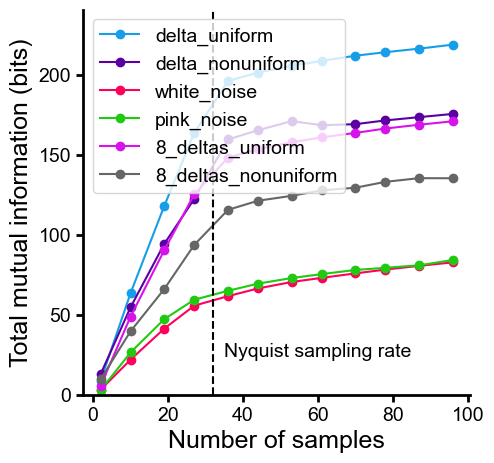

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for object_name, mutual_information in mi_by_object.items():

    total_mi = np.array(mutual_information) * num_samples[:, None]

    max_mi = np.max(total_mi, axis=1)

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.plot(num_samples, max_mi, 'o-', label=object_name)
    ax.set_xlabel('Number of samples')
    ax.set_ylabel('Total mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(max_mi), ax.get_ylim()[1])))

# plot a dashed line at the number of nyquist samples
ax.axvline(num_nyquist_samples, linestyle='--', color='k')
ax.text(num_nyquist_samples + 3, 0.2 * np.max(total_mi), 'Nyquist sampling rate', rotation=0, va='center')
clear_spines(ax)
ax.legend()

## Show phase transition behavior with increasing Nyquist samples

In [4]:
N_objects = 2000
num_bootstraps = 10
noise_sigma = 1e-3
num_samples = np.linspace(2, 96, 15).astype(int)
num_nyquist_samples_list = [8, 16, 24, 32, 48]



objects_fn = lambda : np.array([sample_amplitude_object('delta', num_deltas=1, gaussian_mixture_position=False) for i in range(N_objects)])

mi_vs_num_nyquist_samples = {}
for num_nyquist_samples in tqdm(num_nyquist_samples_list):

  mutual_information = []
  for N in tqdm(num_samples):
    erasure_mask = onp.zeros(OBJECT_LENGTH)
    sample_indices = onp.linspace(0, OBJECT_LENGTH - 1, N).astype(int)
    erasure_mask[sample_indices] = 1
    erasure_mask = np.array(erasure_mask, dtype=bool)
    mi_bootstraps = []
    for k in range(num_bootstraps):
      initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi = optimize_PSF_and_estimate_mi(
          objects_fn, noise_sigma, erasure_mask, num_nyquist_samples=num_nyquist_samples, nyquist_sample_output=False)
      mi_bootstraps.append(optimized_mi)

    mutual_information.append(onp.array(mi_bootstraps).max())
  mi_vs_num_nyquist_samples[num_nyquist_samples] = mutual_information


  0%|                                                         | 0/15 [00:00<?, ?it/s]

initial loss -4.676104845507377
initial loss -4.182811091918675
initial loss -3.9137600462535285
initial loss -3.564542347773964
initial loss -4.703915489797787
initial loss -4.377544428665825
initial loss -4.741510656845199
initial loss -4.3612922764509285
initial loss -4.557739683685398
initial loss -4.132300299695241



  7%|███                                           | 1/15 [05:21<1:15:02, 321.58s/it]

initial loss -4.533588778892561
initial loss -4.48061267235243
initial loss -5.214966980773856
initial loss -3.745326394496332
initial loss -4.988515279706011
initial loss -4.353491561344033
initial loss -4.537408762517754
initial loss -4.180349018855474
initial loss -4.247312854805477
initial loss -4.660356855172571



 13%|██████▏                                       | 2/15 [12:30<1:23:24, 384.95s/it]

initial loss -3.0962541565060313
initial loss -3.16915211842884
initial loss -2.936840834279034
initial loss -3.636683005234461
initial loss -3.141531916268526
initial loss -3.3659385485221227
initial loss -3.3063484053991568
initial loss -2.842439457531429
initial loss -2.6894351396709033
initial loss -3.441680281453158



 20%|█████████▏                                    | 3/15 [20:17<1:24:25, 422.16s/it]

initial loss -2.333859443341121
initial loss -2.3634672170461335
initial loss -1.9593574835974414
initial loss -2.2042283146938018
initial loss -2.3663136256461463
initial loss -2.415827537049849
initial loss -2.170114711400851
initial loss -2.4213147386296505
initial loss -2.367900664598691
initial loss -2.044154976344574



 27%|████████████▎                                 | 4/15 [28:07<1:20:50, 440.95s/it]

initial loss -1.4923479886505795
initial loss -1.621936659847833
initial loss -1.9503274916355313
initial loss -1.6457319783238475
initial loss -1.7861316695827762
initial loss -1.885425676847016
initial loss -1.8866326428453446
initial loss -1.877873750600218
initial loss -1.411195766498772
initial loss -1.6723072976319682



 33%|███████████████▎                              | 5/15 [36:31<1:17:17, 463.78s/it]

initial loss -1.5996441388197684
initial loss -1.5809416204940805
initial loss -1.5314937331954719
initial loss -1.2902295248002704
initial loss -1.4852120947391505
initial loss -1.5084015314853205
initial loss -1.4750856622834987
initial loss -1.442775978561298
initial loss -1.1211386547270117
initial loss -1.4216920277061578



 40%|██████████████████▍                           | 6/15 [43:29<1:07:14, 448.25s/it]

initial loss -1.3262463252181433
initial loss -1.2960496981881597
initial loss -1.2832616227974818
initial loss -1.2631360315131688
initial loss -1.0964121101464566
initial loss -1.3233151557150507
initial loss -1.3108445875875534
initial loss -1.334132298723861
initial loss -1.233274760616207
initial loss -1.2831092976918754



 47%|██████████████████████▍                         | 7/15 [50:37<58:52, 441.57s/it]

initial loss -1.012234050462464
initial loss -1.0981009094606051
initial loss -1.1429498315287923
initial loss -1.1909850717255188
initial loss -1.1254420940120373
initial loss -1.148992919477394
initial loss -1.1586526356386486
initial loss -1.1486059136899478
initial loss -1.038380738108681
initial loss -1.1306365616367322



 53%|█████████████████████████▌                      | 8/15 [57:58<51:29, 441.40s/it]

initial loss -0.7877765497278646
initial loss -0.950662461006954
initial loss -0.8821265122651406
initial loss -0.977037057070466
initial loss -1.0150666092365752
initial loss -1.035682217349308
initial loss -0.9772900179009844
initial loss -0.7822967087993232
initial loss -1.025890410960649
initial loss -0.9759912679898016



 60%|███████████████████████████▌                  | 9/15 [1:05:20<44:10, 441.73s/it]

initial loss -0.8184198221407871
initial loss -0.9661298435916545
initial loss -0.8344278467789302
initial loss -0.8004567745577557
initial loss -0.9809788340508268
initial loss -0.8326480898766943
initial loss -0.9558151262271171
initial loss -0.9437107627823348
initial loss -0.8823337781677003
initial loss -0.9870624630798197



 67%|██████████████████████████████               | 10/15 [1:12:48<36:57, 443.50s/it]

initial loss -0.7738342472674804
initial loss -0.7634254443744788
initial loss -0.8433778586994679
initial loss -0.7855696364456972
initial loss -0.7256989479937929
initial loss -0.8101714159218156
initial loss -0.773467761624595
initial loss -0.787665528694144
initial loss -0.8087569568833632
initial loss -0.8439768337231657



 73%|█████████████████████████████████            | 11/15 [1:21:25<31:04, 466.11s/it]

initial loss -0.6660210595085865
initial loss -0.7182672503000495
initial loss -0.7544972891124788
initial loss -0.669693967412935
initial loss -0.7874638492551966
initial loss -0.7335653154565582
initial loss -0.7256558005729267
initial loss -0.7521396153583102
initial loss -0.7845232117825996
initial loss -0.6421811769795318



 80%|████████████████████████████████████         | 12/15 [1:30:11<24:12, 484.32s/it]

initial loss -0.7446179093849266
initial loss -0.6849154837096965
initial loss -0.7396532277107536
initial loss -0.6992278915680337
initial loss -0.7052064227270844
initial loss -0.6967858155958677
initial loss -0.7769997228723435
initial loss -0.6602029671195905
initial loss -0.5777104281467497
initial loss -0.6621402300627414



 87%|███████████████████████████████████████      | 13/15 [1:38:57<16:33, 496.90s/it]

initial loss -0.62469278898635
initial loss -0.6396262984913678
initial loss -0.6164783145492113
initial loss -0.6302135551269759
initial loss -0.5956305215722623
initial loss -0.5799717237751711
initial loss -0.6457805927204325
initial loss -0.7260926672876084
initial loss -0.6806397705256412
initial loss -0.681618595504572



 93%|██████████████████████████████████████████   | 14/15 [1:48:04<08:32, 512.03s/it]

initial loss -0.5814315841507975
initial loss -0.5605873678652866
initial loss -0.625911171707662
initial loss -0.5998483699094013
initial loss -0.6171655253227857
initial loss -0.4876603413630002
initial loss -0.5518386452808719
initial loss -0.6382815554863952
initial loss -0.576413324059979
initial loss -0.5483373853342848



  0%|                                                         | 0/15 [00:00<?, ?it/s]

initial loss -3.984329553549652
initial loss -2.8766799484227907
initial loss -3.9873711509273275
initial loss -3.9875280717279464
initial loss -3.3790992521095395
initial loss -3.9208280908768067
initial loss -3.9894705582196845
initial loss -3.781244683583192
initial loss -3.74610200795048
initial loss -4.083444383907723



  7%|███                                           | 1/15 [05:58<1:23:34, 358.16s/it]

initial loss -4.349045484567142
initial loss -4.451614463711358
initial loss -4.5475341133483145
initial loss -4.386046314985322
initial loss -4.136574740779082
initial loss -4.716052265319304
initial loss -4.42531073417026
initial loss -4.705625509247421
initial loss -4.561564847681581
initial loss -4.80368803484221



 13%|██████▏                                       | 2/15 [11:55<1:17:27, 357.49s/it]

initial loss -3.9040662022668027
initial loss -3.8326562573745075
initial loss -4.251072939631141
initial loss -4.334341346915713
initial loss -4.193385607674065
initial loss -4.246191797927256
initial loss -3.8010985522043086
initial loss -4.162786632617722
initial loss -3.756344144343377
initial loss -4.339043444586773



 20%|█████████▏                                    | 3/15 [19:25<1:19:56, 399.67s/it]

initial loss -3.4312416382350017
initial loss -3.3136523683324723
initial loss -2.832647120042763
initial loss -3.1916713744575995
initial loss -3.0911289049864097
initial loss -3.5540929853454455
initial loss -3.537490581085439
initial loss -3.473645966480544
initial loss -3.1963863518087154
initial loss -3.4111811691426523



 27%|████████████▎                                 | 4/15 [27:00<1:17:19, 421.80s/it]

initial loss -2.714530622595388
initial loss -2.7761407692262545
initial loss -2.9263388504899708
initial loss -2.5476992153106566
initial loss -2.7754859961176233
initial loss -2.7317983312967056
initial loss -2.825486695356757
initial loss -2.6535410813957703
initial loss -2.831062745470132
initial loss -2.680994336130007



 33%|███████████████▎                              | 5/15 [35:17<1:14:46, 448.68s/it]

initial loss -2.231851909570974
initial loss -2.548287769170931
initial loss -2.1651103811221795
initial loss -2.3407197818684393
initial loss -2.228890061808723
initial loss -2.080553636406761
initial loss -2.114973697254444
initial loss -2.1440061938433734
initial loss -2.0231694820215225
initial loss -2.2612531057304954



 40%|██████████████████▍                           | 6/15 [42:17<1:05:51, 439.09s/it]

initial loss -2.0656278520101434
initial loss -1.9370009228293283
initial loss -1.839846452778277
initial loss -2.023034077231423
initial loss -2.092012081773524
initial loss -2.0329911997525176
initial loss -2.0714390239193765
initial loss -1.8536409222082106
initial loss -2.0962082130381887
initial loss -1.8713578885700497



 47%|██████████████████████▍                         | 7/15 [49:30<58:15, 436.93s/it]

initial loss -1.485648486474096
initial loss -1.830025848566941
initial loss -1.6240312816089228
initial loss -1.8375091047475012
initial loss -1.7360218297295231
initial loss -1.6216421519487147
initial loss -1.6690629165045885
initial loss -1.6184830651195687
initial loss -1.71719943420733
initial loss -1.7807703325608184



 53%|█████████████████████████▌                      | 8/15 [57:00<51:29, 441.38s/it]

initial loss -1.566832549141741
initial loss -1.7161034893466731
initial loss -1.5706630556033812
initial loss -1.6329095134856406
initial loss -1.5746342507784148
initial loss -1.601140185255699
initial loss -1.4918161088874584
initial loss -1.3920756976239925
initial loss -1.5673200370371285
initial loss -1.5655473397336632



 60%|███████████████████████████▌                  | 9/15 [1:04:29<44:21, 443.65s/it]

initial loss -1.4337484754474463
initial loss -1.4677726945265555
initial loss -1.4886599262816935
initial loss -1.2539848152159414
initial loss -1.3890192113602697
initial loss -1.6142659689723793
initial loss -1.4759366602997561
initial loss -1.4854867947802652
initial loss -1.5081810854971793
initial loss -1.4462627781538235



 67%|██████████████████████████████               | 10/15 [1:11:31<36:23, 436.79s/it]

initial loss -1.2905889075560983
initial loss -1.1289535429691235
initial loss -1.2499589178174795
initial loss -1.2841886221177963
initial loss -1.3051215107005378
initial loss -1.332019131579603
initial loss -1.3396131351190845
initial loss -1.2325626174446365
initial loss -1.3668218899238476
initial loss -1.2744214160482383



 73%|█████████████████████████████████            | 11/15 [1:20:17<30:56, 464.12s/it]

initial loss -1.281240419222728
initial loss -1.2033782748876305
initial loss -1.1359404378124154
initial loss -1.250545348496982
initial loss -1.1911409150013272
initial loss -1.0629556182338173
initial loss -1.1459339274830367
initial loss -1.049691457245853
initial loss -1.2578249385669098
initial loss -1.1423139034407583



 80%|████████████████████████████████████         | 12/15 [1:29:20<24:24, 488.08s/it]

initial loss -1.1251968780936799
initial loss -1.1341792110081512
initial loss -1.0478755974631906
initial loss -1.0770748748870225
initial loss -1.0890666597864211
initial loss -1.0415540358135429
initial loss -1.1555541533920404
initial loss -0.9979647439313731
initial loss -1.0445318614372867
initial loss -1.1187368631223666



 87%|███████████████████████████████████████      | 13/15 [1:38:29<16:53, 506.72s/it]

initial loss -1.0195664299438219
initial loss -1.0588866939049604
initial loss -0.9053987276937219
initial loss -1.12916404180217
initial loss -0.9930365054227799
initial loss -1.078604111376958
initial loss -0.9637492402741262
initial loss -0.9058127859506384
initial loss -1.099845723042093
initial loss -1.0164938374160677



 93%|██████████████████████████████████████████   | 14/15 [1:48:11<08:49, 529.29s/it]

initial loss -0.9744177741387736
initial loss -0.9843917383126471
initial loss -0.8923566813544539
initial loss -0.9004858308840884
initial loss -0.8878247784191672
initial loss -0.8773265119535754
initial loss -0.9554660656128491
initial loss -0.9591046085460088
initial loss -0.8907178625412624
initial loss -0.949509229712255



  0%|                                                         | 0/15 [00:00<?, ?it/s]

initial loss -3.569914234320928
initial loss -3.6514068153271673
initial loss -3.608535502241076
initial loss -3.4043952886070485
initial loss -3.5872783159225845
initial loss -3.6816880662274896
initial loss -3.47838677070279
initial loss -3.1737301279308294
initial loss -3.525871705349488
initial loss -3.5866312062743644



  7%|███                                           | 1/15 [06:22<1:29:20, 382.89s/it]

initial loss -3.9098715073993358
initial loss -4.3368912575829075
initial loss -4.1895301945089765
initial loss -3.6257683653638044
initial loss -3.889397499660142
initial loss -3.5670819865640393
initial loss -4.081138370596927
initial loss -4.340315745344203
initial loss -4.258203527765194
initial loss -4.054050114462977



 13%|██████▏                                       | 2/15 [13:41<1:30:00, 415.43s/it]

initial loss -4.127135583729775
initial loss -3.950497174426815
initial loss -3.7735509541474515
initial loss -3.7648276788346866
initial loss -3.719889786032954
initial loss -3.8859537339193544
initial loss -3.720744912753243
initial loss -3.43421457233193
initial loss -4.182420807368958
initial loss -3.6770727818086915



 20%|█████████▏                                    | 3/15 [21:18<1:26:55, 434.66s/it]

initial loss -3.691308953678284
initial loss -3.6445932187016874
initial loss -3.7085066214513795
initial loss -3.5058488307360394
initial loss -4.165820652026709
initial loss -3.648504202048464
initial loss -3.9929383227341306
initial loss -3.6578646345564807
initial loss -3.717594731297152
initial loss -3.5853892127195364



 27%|████████████▎                                 | 4/15 [28:41<1:20:17, 437.95s/it]

initial loss -3.2669585256117513
initial loss -3.401118095201122
initial loss -3.913723097359541
initial loss -3.8045960944517234
initial loss -3.425854363455654
initial loss -3.385456102122177
initial loss -3.583059097297839
initial loss -3.1824841084708813
initial loss -3.4178057706333362
initial loss -3.296148600056258



 33%|███████████████▎                              | 5/15 [36:45<1:15:46, 454.61s/it]

initial loss -2.8667029126428196
initial loss -2.4888584211156535
initial loss -2.808948720890249
initial loss -2.645526417728612
initial loss -2.8445426225517485
initial loss -2.678654375362032
initial loss -2.6968993375170127
initial loss -2.5251746870785707
initial loss -3.008577287539602
initial loss -2.960932335171479



 40%|██████████████████▍                           | 6/15 [43:42<1:06:15, 441.76s/it]

initial loss -2.4699638694503427
initial loss -2.5169236776443182
initial loss -2.376445658476447
initial loss -2.386133896293623
initial loss -2.442161753436748
initial loss -2.28704074797609
initial loss -2.4144813429301863
initial loss -2.61725012141297
initial loss -2.420740495307476
initial loss -2.6614932741619675



 47%|██████████████████████▍                         | 7/15 [51:03<58:52, 441.52s/it]

initial loss -2.320202698892648
initial loss -2.0542745514662197
initial loss -2.010875315786193
initial loss -1.9890714998127037
initial loss -2.3565883334668696
initial loss -2.291048743057699
initial loss -2.320342801609339
initial loss -2.168800170504696
initial loss -1.867488247425557
initial loss -2.0519622960096333



 53%|█████████████████████████▌                      | 8/15 [58:25<51:30, 441.51s/it]

initial loss -2.030242159365616
initial loss -2.0705067636809713
initial loss -1.9662047242362017
initial loss -1.836166245049467
initial loss -2.060510720841014
initial loss -2.1474786312045127
initial loss -1.9730347800494334
initial loss -1.902414033335022
initial loss -2.12849788653846
initial loss -1.6824498592825763



 60%|███████████████████████████▌                  | 9/15 [1:06:07<44:47, 447.93s/it]

initial loss -1.5719491112158588
initial loss -1.8820054797232042
initial loss -1.9732849422241794
initial loss -1.8343108819446392
initial loss -1.6350614662552159
initial loss -1.844544261165802
initial loss -1.7742134271633332
initial loss -1.7313051477393857
initial loss -1.639918797436277
initial loss -1.812575502572406



 67%|██████████████████████████████               | 10/15 [1:13:39<37:25, 449.14s/it]

initial loss -1.6142250700317273
initial loss -1.6617752555495298
initial loss -1.4770659269475588
initial loss -1.7640410358064957
initial loss -1.5354943126880656
initial loss -1.5506890701294886
initial loss -1.555601126226511
initial loss -1.7661884103915468
initial loss -1.5666449384266772
initial loss -1.6419832358506938



 73%|█████████████████████████████████            | 11/15 [1:22:17<31:21, 470.30s/it]

initial loss -1.4865009841706198
initial loss -1.4816849185194767
initial loss -1.5142550327229956
initial loss -1.3826273374169156
initial loss -1.5368596105474812
initial loss -1.4978656119080982
initial loss -1.4006747217340505
initial loss -1.5349537794397334
initial loss -1.473226202052233
initial loss -1.5112678652689804



 80%|████████████████████████████████████         | 12/15 [1:31:05<24:23, 487.88s/it]

initial loss -1.2532280431883622
initial loss -1.430300225905343
initial loss -1.4872610051654354
initial loss -1.4789226039159216
initial loss -1.2578510088340862
initial loss -1.3624712310757159
initial loss -1.4935797981644203
initial loss -1.4051390371052177
initial loss -1.363521356674069
initial loss -1.40612177965327



 87%|███████████████████████████████████████      | 13/15 [1:40:37<17:06, 513.33s/it]

initial loss -1.3504110127887277
initial loss -1.3503504795325962
initial loss -1.0998360231119337
initial loss -1.2472499043027863
initial loss -1.3502849907547125
initial loss -1.238088973068143
initial loss -1.268962279134233
initial loss -1.4123418675123887
initial loss -1.355650790152971
initial loss -1.3099283294298016



 93%|██████████████████████████████████████████   | 14/15 [1:50:23<08:55, 535.28s/it]

initial loss -1.1335638008653794
initial loss -1.3016836147847797
initial loss -1.118314297365397
initial loss -1.1654312199366648
initial loss -1.1952074188119683
initial loss -0.972417096426082
initial loss -1.2644302712725193
initial loss -1.1806765708147258
initial loss -1.2607632986783266
initial loss -1.2474366142289355



  0%|                                                         | 0/15 [00:00<?, ?it/s]

initial loss -3.2927809421797702
initial loss -3.498054627277162
initial loss -3.123908836721755
initial loss -3.3564353299507985
initial loss -3.222295664942684
initial loss -3.468517686584323
initial loss -3.262451072057207
initial loss -3.2581410686435515
initial loss -3.239013878431369
initial loss -3.3615401313418642



  7%|███                                           | 1/15 [06:21<1:28:59, 381.40s/it]

initial loss -3.54952747691249
initial loss -3.858027731205847
initial loss -3.6146262000118745
initial loss -3.7669126122288605
initial loss -3.787107833813484
initial loss -3.8894526720658256
initial loss -3.9253928847873736
initial loss -3.471145523782172
initial loss -3.933499369218452
initial loss -3.6980918423764804



 13%|██████▏                                       | 2/15 [13:39<1:29:51, 414.75s/it]

initial loss -3.4796940042339255
initial loss -3.6142274362915385
initial loss -3.548342925601124
initial loss -3.817571117698357
initial loss -3.5703480276046218
initial loss -3.456751538940482
initial loss -3.66292762257209
initial loss -3.541790553501911
initial loss -3.7705339475271007
initial loss -3.6734136066906755



 20%|█████████▏                                    | 3/15 [21:20<1:27:12, 436.07s/it]

initial loss -3.1185961252224077
initial loss -3.288569191325732
initial loss -3.5767535682003393
initial loss -3.5911286046125697
initial loss -3.33909602698896
initial loss -3.5533679762362214
initial loss -3.225067065729524
initial loss -3.924987508695386
initial loss -3.1107203514273283
initial loss -3.564206803902743



 27%|████████████▎                                 | 4/15 [28:54<1:21:10, 442.80s/it]

initial loss -3.201905637974657
initial loss -3.121333585308988
initial loss -3.32849049201167
initial loss -3.264454966953635
initial loss -2.865988209688761
initial loss -3.133140957841813
initial loss -3.250604188219599
initial loss -3.1395683393860274
initial loss -3.6288240688092555
initial loss -3.584770615781333



 33%|███████████████▎                              | 5/15 [36:50<1:15:48, 454.86s/it]

initial loss -3.630669879606011
initial loss -3.07770677698079
initial loss -3.303445278947719
initial loss -3.3740965108129104
initial loss -3.270526335817369
initial loss -3.1342834752418156
initial loss -3.335897536719373
initial loss -3.2343009198388772
initial loss -3.1836747044732827
initial loss -3.518965457237205



 40%|██████████████████▍                           | 6/15 [44:05<1:07:14, 448.24s/it]

initial loss -2.9604407537721045
initial loss -2.646737597958666
initial loss -3.053130422300599
initial loss -2.72503678452238
initial loss -2.698455417801774
initial loss -2.5906853930823326
initial loss -2.8256744905200577
initial loss -2.9185841071797864
initial loss -2.7101377313762782
initial loss -2.633451575302814



 47%|██████████████████████▍                         | 7/15 [51:30<59:36, 447.02s/it]

initial loss -2.3947641352065934
initial loss -2.5869343166751517
initial loss -2.5487850284526847
initial loss -2.3480792480685806
initial loss -2.4104903876643062
initial loss -2.1541798909756205
initial loss -2.3067704030146436
initial loss -2.48663464932046
initial loss -2.443455219249932
initial loss -2.4752316039917908



 53%|█████████████████████████▌                      | 8/15 [59:00<52:15, 447.95s/it]

initial loss -2.172926094757311
initial loss -2.112215816869325
initial loss -2.299977634385784
initial loss -2.1039596969823284
initial loss -2.448545581394036
initial loss -2.0674511121146057
initial loss -2.068906520455994
initial loss -2.1841892800736518
initial loss -2.115957115051334
initial loss -2.1332974690273128



 60%|███████████████████████████▌                  | 9/15 [1:06:40<45:11, 451.87s/it]

initial loss -2.0730240333053853
initial loss -2.0368293935210375
initial loss -2.119513893466178
initial loss -1.8652798765747178
initial loss -1.9494938075739205
initial loss -2.24486867464718
initial loss -2.0952753194882963
initial loss -1.9401831439772905
initial loss -1.9461334175497247
initial loss -1.886551554514444



 67%|██████████████████████████████               | 10/15 [1:14:29<38:05, 457.12s/it]

initial loss -1.6691000875569446
initial loss -1.8831434080463947
initial loss -1.8976198251942964
initial loss -1.8936351779196796
initial loss -2.007946640120331
initial loss -1.9551430179511462
initial loss -1.9046133968584278
initial loss -1.8664510428626289
initial loss -1.7553045796543396
initial loss -1.776691190005614



 73%|█████████████████████████████████            | 11/15 [1:23:39<32:21, 485.45s/it]

initial loss -1.6796884201100386
initial loss -1.7063433550028135
initial loss -1.7604013959398412
initial loss -1.5729113608269452
initial loss -1.889800114013896
initial loss -1.7949878849421552
initial loss -1.61953678688278
initial loss -1.9169352207021486
initial loss -1.500523514465904
initial loss -1.7495374558055092



 80%|████████████████████████████████████         | 12/15 [1:32:58<25:23, 507.98s/it]

initial loss -1.5000743115790243
initial loss -1.608543558960713
initial loss -1.6650964626246318
initial loss -1.5298152094032402
initial loss -1.5978336525526633
initial loss -1.548863608038068
initial loss -1.567265131046552
initial loss -1.628403176642514
initial loss -1.6646264140559321
initial loss -1.6951855682680066



 87%|███████████████████████████████████████      | 13/15 [1:42:31<17:35, 527.53s/it]

initial loss -1.4887823952775074
initial loss -1.399343365209088
initial loss -1.3818821454667845
initial loss -1.5148104353103893
initial loss -1.3867018082711609
initial loss -1.5422060909781679
initial loss -1.5390476220971734
initial loss -1.4448240330441844
initial loss -1.4783178243130073
initial loss -1.4074120118512738



 93%|██████████████████████████████████████████   | 14/15 [1:52:19<09:05, 545.77s/it]

initial loss -1.3032640212644362
initial loss -1.3268249326748616
initial loss -1.3569889093257457
initial loss -1.424601448119412
initial loss -1.494125005815792
initial loss -1.542230667650054
initial loss -1.4039946440833737
initial loss -1.4347253544764746
initial loss -1.3237598024712574
initial loss -1.4173301163400396



  0%|                                                         | 0/15 [00:00<?, ?it/s]

initial loss -2.9605552537844346
initial loss -3.100251368309161
initial loss -3.0593739428455713
initial loss -3.2097315234573127
initial loss -2.4832811604831693
initial loss -2.940764069987262
initial loss -3.0390929470337102
initial loss -2.8083877816307443
initial loss -2.746107922788733
initial loss -3.0279570052168374



  7%|███                                           | 1/15 [06:46<1:34:53, 406.66s/it]

initial loss -3.1218526272881064
initial loss -3.382531149397739
initial loss -3.224307614478911
initial loss -3.3749309280405755
initial loss -3.208985683833759
initial loss -3.0308635469822445
initial loss -3.2245816316048335
initial loss -3.06969784305595
initial loss -3.178029322333387
initial loss -3.462047356315244



 13%|██████▏                                       | 2/15 [14:09<1:32:39, 427.67s/it]

initial loss -3.049067478820614
initial loss -3.275416811205354
initial loss -3.2926511701025003
initial loss -2.960451393287308
initial loss -3.107209823161433
initial loss -3.2395424192184765
initial loss -3.108953485567978
initial loss -3.201612580218126
initial loss -3.1415612071413217
initial loss -3.0950858799190017



 20%|█████████▏                                    | 3/15 [33:51<2:34:28, 772.39s/it]

initial loss -2.9261779972657678
initial loss -3.1060245142996674
initial loss -3.204824628822868
initial loss -2.955513814791184
initial loss -3.0764287384120452
initial loss -3.066636742280522
initial loss -3.2058654100067185
initial loss -3.0033841899651574
initial loss -3.247189914672578
initial loss -3.1038076911190147



 27%|████████████                                 | 4/15 [56:50<3:05:30, 1011.85s/it]

initial loss -2.9853802285711772
initial loss -2.8465911589576156
initial loss -3.0948708754128447
initial loss -3.023189073450359
initial loss -3.2644690816698416
initial loss -2.8123756397984656
initial loss -3.1053550513697985
initial loss -3.1384550772284507
initial loss -3.0894870073308076
initial loss -2.5973082981531364



 33%|██████████████▎                            | 5/15 [1:21:11<3:15:36, 1173.66s/it]

initial loss -2.9188914313363608
initial loss -3.0452360764184356
initial loss -2.983962761214382
initial loss -2.9564956225079384
initial loss -2.5663325234371626
initial loss -2.8600831407104828
initial loss -2.714348553705857
initial loss -2.6022399239151217
initial loss -3.143920977192725
initial loss -2.877939485820691



 40%|█████████████████▏                         | 6/15 [1:42:59<3:02:56, 1219.61s/it]

initial loss -3.299519532888435
initial loss -2.5983566819450044
initial loss -2.8975816041888636
initial loss -2.332327023059324
initial loss -2.628932482698023
initial loss -3.2059831720610332
initial loss -3.083248550875444
initial loss -2.9193225888624554
initial loss -2.870920839251726
initial loss -2.997512775862852



 47%|████████████████████                       | 7/15 [2:05:20<2:47:53, 1259.20s/it]

initial loss -2.839704056561063
initial loss -2.76962090630964
initial loss -2.7047181390203057
initial loss -2.5834895254838055
initial loss -2.756155338239241
initial loss -2.685134338539699
initial loss -2.5577547482023677
initial loss -2.7251355006803
initial loss -2.454041699120746
initial loss -2.5852929411755317



 53%|██████████████████████▉                    | 8/15 [2:23:40<2:20:59, 1208.47s/it]

initial loss -2.8136263361593663
initial loss -2.0545622899343843
initial loss -2.77758007911474
initial loss -2.6026320710101767
initial loss -2.6122054334739677
initial loss -2.5405574496603083
initial loss -2.5304267026063045
initial loss -2.673209252593605
initial loss -2.3471069248465586
initial loss -2.510503361771154



 60%|██████████████████████████▍                 | 9/15 [2:31:16<1:37:20, 973.35s/it]

initial loss -2.267252413532517
initial loss -2.3103196616666373
initial loss -2.425860797283623
initial loss -2.412466952223104
initial loss -2.267631877664921
initial loss -2.3546702914555264
initial loss -2.4708113385855865
initial loss -2.160085154725832
initial loss -2.2546575946671337
initial loss -2.143815801481844



 67%|████████████████████████████▋              | 10/15 [2:43:16<1:14:34, 894.87s/it]

initial loss -2.2137273022892483
initial loss -2.191916092930849
initial loss -2.17074219099082
initial loss -2.356705194509543
initial loss -2.396467016542573
initial loss -2.2169821577581477
initial loss -2.194807822027772
initial loss -2.093168204845293
initial loss -2.3442740527192085
initial loss -2.201052165363755



 73%|█████████████████████████████████            | 11/15 [2:56:05<57:06, 856.58s/it]

initial loss -1.927162510249642
initial loss -1.8751584337796394
initial loss -2.255840831490812
initial loss -2.1231211314535545
initial loss -2.128651704616381
initial loss -1.9494656262247347
initial loss -2.1784050685105565
initial loss -2.1649715918358705
initial loss -1.9178828694348273
initial loss -1.8038193761780543



 80%|████████████████████████████████████         | 12/15 [3:07:08<39:52, 797.62s/it]

initial loss -2.010850154090986
initial loss -1.6739550720719014
initial loss -1.8440462280132017
initial loss -1.8549928520028482
initial loss -1.8944689153656928
initial loss -1.9605064694894654
initial loss -1.674316346419819
initial loss -1.7856369098456788
initial loss -1.9781333846119027
initial loss -1.8084395987962008



 87%|███████████████████████████████████████      | 13/15 [3:16:25<24:09, 724.85s/it]

initial loss -1.6061292035216663
initial loss -1.7146750352083677
initial loss -1.4481629111956509
initial loss -1.8704236340184515
initial loss -1.652930596565513
initial loss -1.678304305660203
initial loss -1.7893154830971367
initial loss -1.6024131780909148
initial loss -1.9280710439306326
initial loss -1.9232303237476336



 93%|██████████████████████████████████████████   | 14/15 [3:25:59<11:19, 679.23s/it]

initial loss -1.452594517395844
initial loss -1.4848800897867052
initial loss -1.7275694375002886
initial loss -1.7373105515114582
initial loss -1.8298664237425797
initial loss -1.5354855852361444
initial loss -1.5266890388760515
initial loss -1.4103619574824577
initial loss -1.731591820034203
initial loss -1.5976184054320692



100%|█████████████████████████████████████████████| 5/5 [11:33:30<00:00, 8322.08s/it]


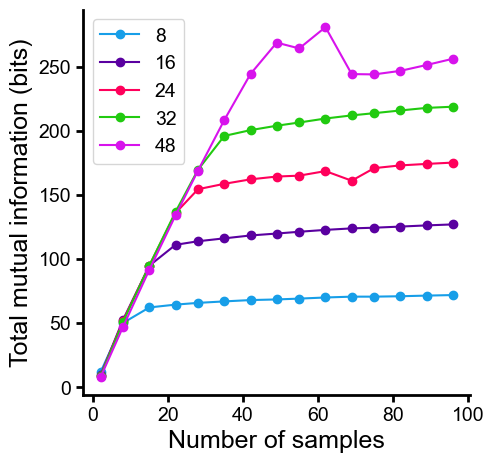

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for num_nyquist_samples, mutual_information in mi_vs_num_nyquist_samples.items():

    total_mi = np.array(mutual_information) * num_samples


    # ax.plot(num_samples, mutual_information, 'o-')
    ax.plot(num_samples, total_mi, 'o-', label=num_nyquist_samples)
    ax.set_xlabel('Number of samples')
    ax.set_ylabel('Total mutual information (bits)')

    # ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

# plot a dashed line at the number of nyquist samples
# ax.axvline(num_nyquist_samples, linestyle='--', color='k')
# ax.text(num_nyquist_samples + 3, 0.2 * np.max(total_mi), 'Nyquist sampling rate', rotation=0, va='center')
clear_spines(ax)
ax.legend()

## Show transition behavior with different SNR levels

In [6]:
N_objects = 2000
num_bootstraps = 10
num_samples = np.linspace(2, 96, 15).astype(int)

objects_fn = lambda : np.array([sample_amplitude_object('delta', num_deltas=1, gaussian_mixture_position=False) for i in range(N_objects)])

noise_sigma_list = [1e-6, 1e-5, 1e-4, 1e-3, 4e-3]

mi_vs_num_samples_by_noise = {}
for noise_sigma in tqdm(noise_sigma_list):
  mutual_information = []
  for N in num_samples:
    erasure_mask = onp.zeros(OBJECT_LENGTH)
    sample_indices = onp.linspace(0, OBJECT_LENGTH - 1, N).astype(int)
    erasure_mask[sample_indices] = 1
    erasure_mask = np.array(erasure_mask, dtype=bool)
    mi_bootstraps = []
    for k in range(num_bootstraps):
      initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi = optimize_PSF_and_estimate_mi(
          objects_fn, noise_sigma, erasure_mask, num_nyquist_samples=NUM_NYQUIST_SAMPLES, nyquist_sample_output=False)
      mi_bootstraps.append(optimized_mi)

    mutual_information.append(onp.array(mi_bootstraps).max())
  mi_vs_num_samples_by_noise[noise_sigma] = mutual_information


  0%|                                                          | 0/5 [00:00<?, ?it/s]

initial loss -13.434291947670385
initial loss -12.981072768193025
initial loss -13.34758899351144
initial loss -12.82550542266725
initial loss -13.65175221692257
initial loss -13.527992821545165
initial loss -13.453397280166405
initial loss -13.116161272642625
initial loss -13.19052929238612
initial loss -13.345125074158744
initial loss -13.837760191590522
initial loss -13.416274774797447
initial loss -13.617296017938049
initial loss -13.63918326790186
initial loss -13.662338682586759
initial loss -13.681408793365847
initial loss -13.78671023578464
initial loss -13.802011246804444
initial loss -13.603315232726962
initial loss -13.652626661888704
initial loss -13.680450059054419
initial loss -13.16099348756411
initial loss -13.89289689295225
initial loss -13.840977479019168
initial loss -13.603779776725998
initial loss -13.662485968970572
initial loss -13.706606485630518
initial loss -13.486376292975216
initial loss -13.596790816523662
initial loss -13.354058480243898
initial loss -12.9

 20%|████████▊                                   | 1/5 [2:23:42<9:34:51, 8622.77s/it]

initial loss -10.026664844897496
initial loss -10.123435263222568
initial loss -9.739131417158223
initial loss -9.802591436601762
initial loss -10.072729668663948
initial loss -10.060925844972232
initial loss -9.52679045773338
initial loss -9.948482144613404
initial loss -9.92294964327162
initial loss -9.912733374460341
initial loss -10.304319354755908
initial loss -10.301916172409882
initial loss -10.37361860885426
initial loss -10.241187831503247
initial loss -10.462856471024764
initial loss -10.709662763336118
initial loss -10.306826968567535
initial loss -10.196297376781821
initial loss -10.20441191329515
initial loss -10.434204676824658
initial loss -10.264906323422311
initial loss -10.204881109187927
initial loss -10.22097136359276
initial loss -10.429539321571902
initial loss -10.112025476396843
initial loss -9.984144868327784
initial loss -10.243503706230966
initial loss -10.22384312018171
initial loss -10.336269548761788
initial loss -10.242350565640002
initial loss -9.6861880

 40%|█████████████████▌                          | 2/5 [4:59:22<7:32:14, 9044.71s/it]

initial loss -6.682262384318114
initial loss -6.782528378485962
initial loss -6.412820339657957
initial loss -6.5609369522084435
initial loss -6.634274529739628
initial loss -6.354472700126754
initial loss -6.832402122561621
initial loss -6.421193146012762
initial loss -6.456664308191478
initial loss -6.6796932212488205
initial loss -7.19070032509539
initial loss -6.896872029636565
initial loss -7.21084554340106
initial loss -6.9270688534075315
initial loss -7.163238017406231
initial loss -7.252536735352498
initial loss -7.170794279222792
initial loss -7.122352897807026
initial loss -7.208803622597291
initial loss -7.333066597281949
initial loss -7.001340861033193
initial loss -6.491113529536004
initial loss -7.194447082530637
initial loss -7.129552289139572
initial loss -7.064130469395579
initial loss -6.903151201384268
initial loss -6.864177865653927
initial loss -7.159160661020877
initial loss -7.027157327672952
initial loss -7.16011479803266
initial loss -6.5070342872053235
initial

 60%|██████████████████████████▍                 | 3/5 [6:58:37<4:32:43, 8181.83s/it]

initial loss -3.228567554021078
initial loss -3.4616999740813723
initial loss -3.3436590480839663
initial loss -3.3395133729131548
initial loss -3.4147129975116055
initial loss -3.079654293522383
initial loss -3.4757345842048704
initial loss -3.3201537277226825
initial loss -2.848781492476508
initial loss -3.0267322945562776
initial loss -3.4214411731756362
initial loss -3.764451101161094
initial loss -3.6772924202518302
initial loss -3.610149721897598
initial loss -4.007522188971067
initial loss -3.618193370786902
initial loss -3.786152670165051
initial loss -3.519283294170898
initial loss -3.8000733501950643
initial loss -3.8510054486917165
initial loss -3.7547598323636464
initial loss -3.4799613971118752
initial loss -3.49909720517175
initial loss -3.5299527754629647
initial loss -3.794206887816521
initial loss -3.634750957857363
initial loss -4.054733144610454
initial loss -3.4738541494349797
initial loss -3.492290525097377
initial loss -3.616094136270486
initial loss -3.3349782746

 80%|███████████████████████████████████▏        | 4/5 [8:58:14<2:09:44, 7784.81s/it]

initial loss -1.3976239409461724
initial loss -1.2856994475259214
initial loss -1.1649052013652226
initial loss -1.4313327658372448
initial loss -1.4943683012104103
initial loss -1.7148922623869387
initial loss -1.3268535225619118
initial loss -1.5038106381012066
initial loss -1.5252560787493048
initial loss -1.5790456519269216
initial loss -1.85425867729359
initial loss -2.0984189323261235
initial loss -2.1808340671380275
initial loss -1.9718232586133062
initial loss -1.7152329077513468
initial loss -1.7558711956107431
initial loss -1.7176219213574748
initial loss -1.5669690645252277
initial loss -1.859298746571354
initial loss -1.5805492202317648
initial loss -1.6661248721979882
initial loss -1.7370357553655644
initial loss -1.9502856661135544
initial loss -1.7284986070621666
initial loss -1.770531797767207
initial loss -1.9071534151824616
initial loss -1.8978924523099898
initial loss -1.7777720539352844
initial loss -1.846929204659647
initial loss -1.896553765860747
initial loss -2.

100%|█████████████████████████████████████████████| 5/5 [10:57:40<00:00, 7892.10s/it]


[Text(0.5, 1.0, 'SNR comparison')]

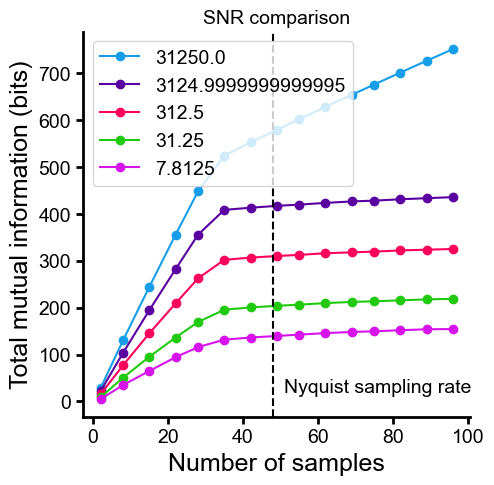

In [7]:
snrs = (1 / NUM_NYQUIST_SAMPLES) / np.array(noise_sigma_list)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for (noise_sigma, mutual_information), snr in zip(mi_vs_num_samples_by_noise.items(), snrs):

    total_mi = np.array(mutual_information) * num_samples

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.plot(num_samples, total_mi, 'o-', label=snr)
    ax.set_xlabel('Number of samples')
    ax.set_ylabel('Total mutual information (bits)')

    # ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

# plot a dashed line at the number of nyquist samples
ax.axvline(NUM_NYQUIST_SAMPLES, linestyle='--', color='k')
ax.text(NUM_NYQUIST_SAMPLES + 3, 0.2 * np.max(total_mi), 'Nyquist sampling rate', rotation=0, va='center')
clear_spines(ax)
ax.legend()
ax.set(title='SNR comparison')